In [2]:
#Manejo de datos
import numpy as np
import pandas as pd

#Sklearn
#Preprocesamiento
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
#Modelado
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree

from sklearn.metrics import accuracy_score, confusion_matrix

#Visualización
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("medicina.csv")

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Height,Weight,Exercise,HealthyEating
0,23,F,HIGH,HIGH,25.355,drugY,167.494363,107.766413,0.0,0.0
1,47,M,LOW,HIGH,13.093,drugC,171.866737,43.332084,1.0,0.0
2,47,M,LOW,HIGH,10.114,drugC,178.318211,72.814734,1.0,1.0
3,28,F,NORMAL,HIGH,7.798,drugX,180.900052,56.813694,1.0,0.0
4,61,F,LOW,HIGH,18.043,drugY,167.937282,81.902153,1.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            500 non-null    int64  
 1   Sex            500 non-null    object 
 2   BP             500 non-null    object 
 3   Cholesterol    500 non-null    object 
 4   Na_to_K        500 non-null    float64
 5   Drug           500 non-null    object 
 6   Height         500 non-null    float64
 7   Weight         500 non-null    float64
 8   Exercise       500 non-null    float64
 9   HealthyEating  500 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 39.2+ KB


In [6]:
genero_mapping = {'F': 0, 'M': 1}
df['Sex'] = df['Sex'].map(genero_mapping)
nivel_mapping = {'LOW': 0, 'NORMAL': 1, 'HIGH': 2}
df['BP'] = df['BP'].map(nivel_mapping)

In [7]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Height,Weight,Exercise,HealthyEating
0,23,0,2,HIGH,25.355,drugY,167.494363,107.766413,0.0,0.0
1,47,1,0,HIGH,13.093,drugC,171.866737,43.332084,1.0,0.0
2,47,1,0,HIGH,10.114,drugC,178.318211,72.814734,1.0,1.0
3,28,0,1,HIGH,7.798,drugX,180.900052,56.813694,1.0,0.0
4,61,0,0,HIGH,18.043,drugY,167.937282,81.902153,1.0,0.0


In [8]:
colesterol_mapping = {'LOW': 0, 'NORMAL': 1, 'HIGH': 2}
df['Cholesterol'] = df['Cholesterol'].map(colesterol_mapping)
drug_mapping = {'drugA': 0, 'drugB': 1, 'drugC': 2, 'drugX': 3, 'drugY': 4}
df['Drug'] = df['Drug'].map(drug_mapping)

In [9]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Height,Weight,Exercise,HealthyEating
0,23,0,2,2,25.355,4,167.494363,107.766413,0.0,0.0
1,47,1,0,2,13.093,2,171.866737,43.332084,1.0,0.0
2,47,1,0,2,10.114,2,178.318211,72.814734,1.0,1.0
3,28,0,1,2,7.798,3,180.900052,56.813694,1.0,0.0
4,61,0,0,2,18.043,4,167.937282,81.902153,1.0,0.0


In [10]:
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [11]:
df_normalized

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Height,Weight,Exercise,HealthyEating
0,0.135593,0.0,1.0,1.0,0.596848,1.00,0.516136,0.932136,0.0,0.0
1,0.542373,1.0,0.0,1.0,0.213397,0.50,0.575833,0.155031,1.0,0.0
2,0.542373,1.0,0.0,1.0,0.120239,0.50,0.663918,0.510604,1.0,1.0
3,0.220339,0.0,0.5,1.0,0.047814,0.75,0.699169,0.317625,1.0,0.0
4,0.779661,0.0,0.0,1.0,0.368191,1.00,0.522183,0.620202,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
495,0.627119,1.0,0.0,0.0,0.833479,1.00,0.621368,0.548816,1.0,1.0
496,0.745763,1.0,1.0,1.0,0.239727,0.25,0.617517,0.468478,1.0,0.0
497,0.559322,0.0,0.0,1.0,0.274157,1.00,1.000000,0.172159,0.0,1.0
498,0.898305,1.0,1.0,1.0,0.148227,0.25,0.601703,0.689298,1.0,1.0


In [12]:
print(df['Sex'].value_counts())
print(df['BP'].value_counts())
print(df['Cholesterol'].value_counts())
print(df['Drug'].value_counts())

0    256
1    244
Name: Sex, dtype: int64
2    183
0    167
1    150
Name: BP, dtype: int64
2    253
1    247
Name: Cholesterol, dtype: int64
4    233
3    150
0     50
2     35
1     32
Name: Drug, dtype: int64


## Relaciones entre Variables

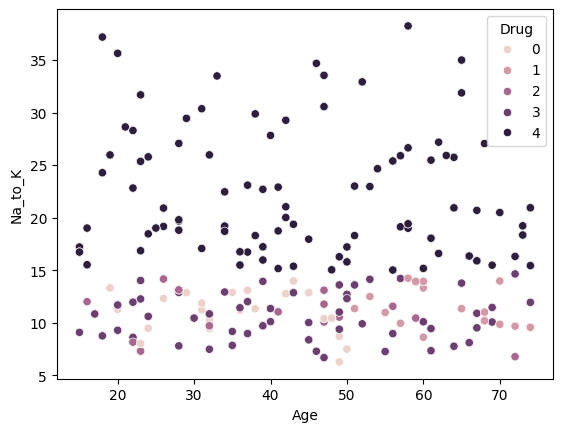

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Age', y='Na_to_K', hue='Drug', data=df)
plt.show()

## Heatmap de correlación

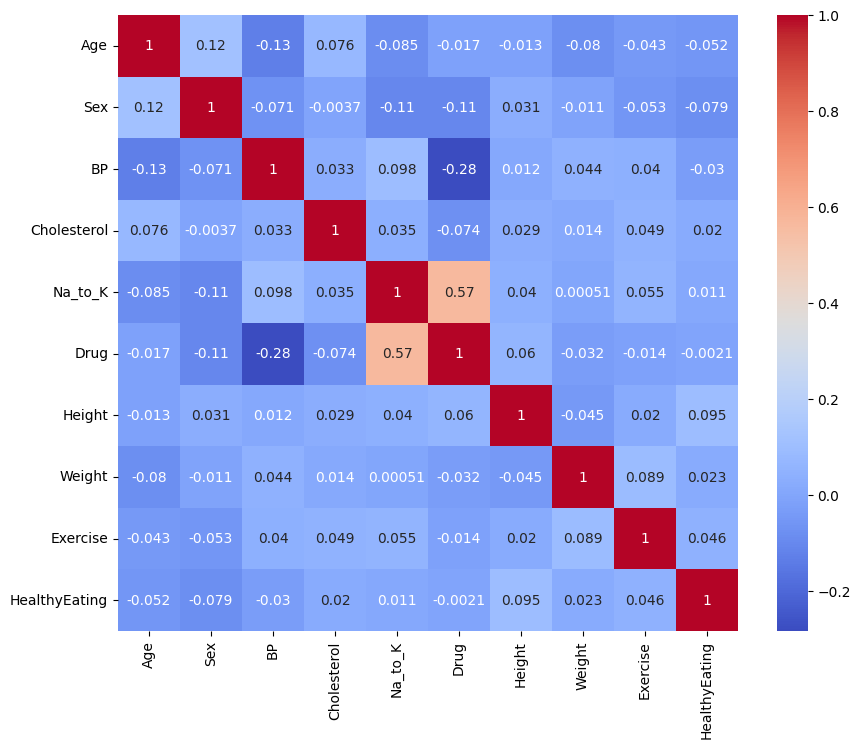

In [14]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Examina la distribución de edades para diferentes valores de la variable 'Sex'.

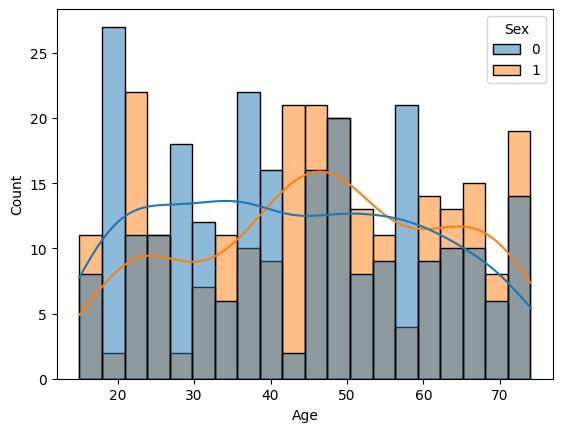

In [15]:
sns.histplot(data=df, x='Age', hue='Sex', bins=20, kde=True)
plt.show()

## Pre Pruning

In [16]:
X = df_normalized.drop(columns=["Drug"])
y = df_normalized['Drug']

In [17]:
X.shape, y.shape

((500, 9), (500,))

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X,y, stratify=y)
x_train.shape , x_test.shape

((375, 9), (125, 9))

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
clf = tree.DecisionTreeClassifier(random_state = 8)

clf.fit(x_train, y_train_encoded)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

[Text(0.625, 0.9, 'Na_to_K <= 0.268\ngini = 0.674\nsamples = 375\nvalue = [38.0, 24.0, 26.0, 112.0, 175.0]\nclass = drugY'),
 Text(0.5, 0.7, 'BP <= 0.75\ngini = 0.619\nsamples = 200\nvalue = [38.0, 24.0, 26.0, 112.0, 0.0]\nclass = drugX'),
 Text(0.25, 0.5, 'Cholesterol <= 0.5\ngini = 0.306\nsamples = 138\nvalue = [0, 0, 26, 112, 0]\nclass = drugX'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 75\nvalue = [0, 0, 0, 75, 0]\nclass = drugX'),
 Text(0.375, 0.3, 'BP <= 0.25\ngini = 0.485\nsamples = 63\nvalue = [0, 0, 26, 37, 0]\nclass = drugX'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 26, 0, 0]\nclass = drugC'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 0, 37, 0]\nclass = drugX'),
 Text(0.75, 0.5, 'Age <= 0.602\ngini = 0.475\nsamples = 62\nvalue = [38, 24, 0, 0, 0]\nclass = drugA'),
 Text(0.625, 0.3, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0, 0, 0]\nclass = drugA'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 24\nvalue = [0, 24, 0, 0, 0]\nclass = drugB'),
 Tex

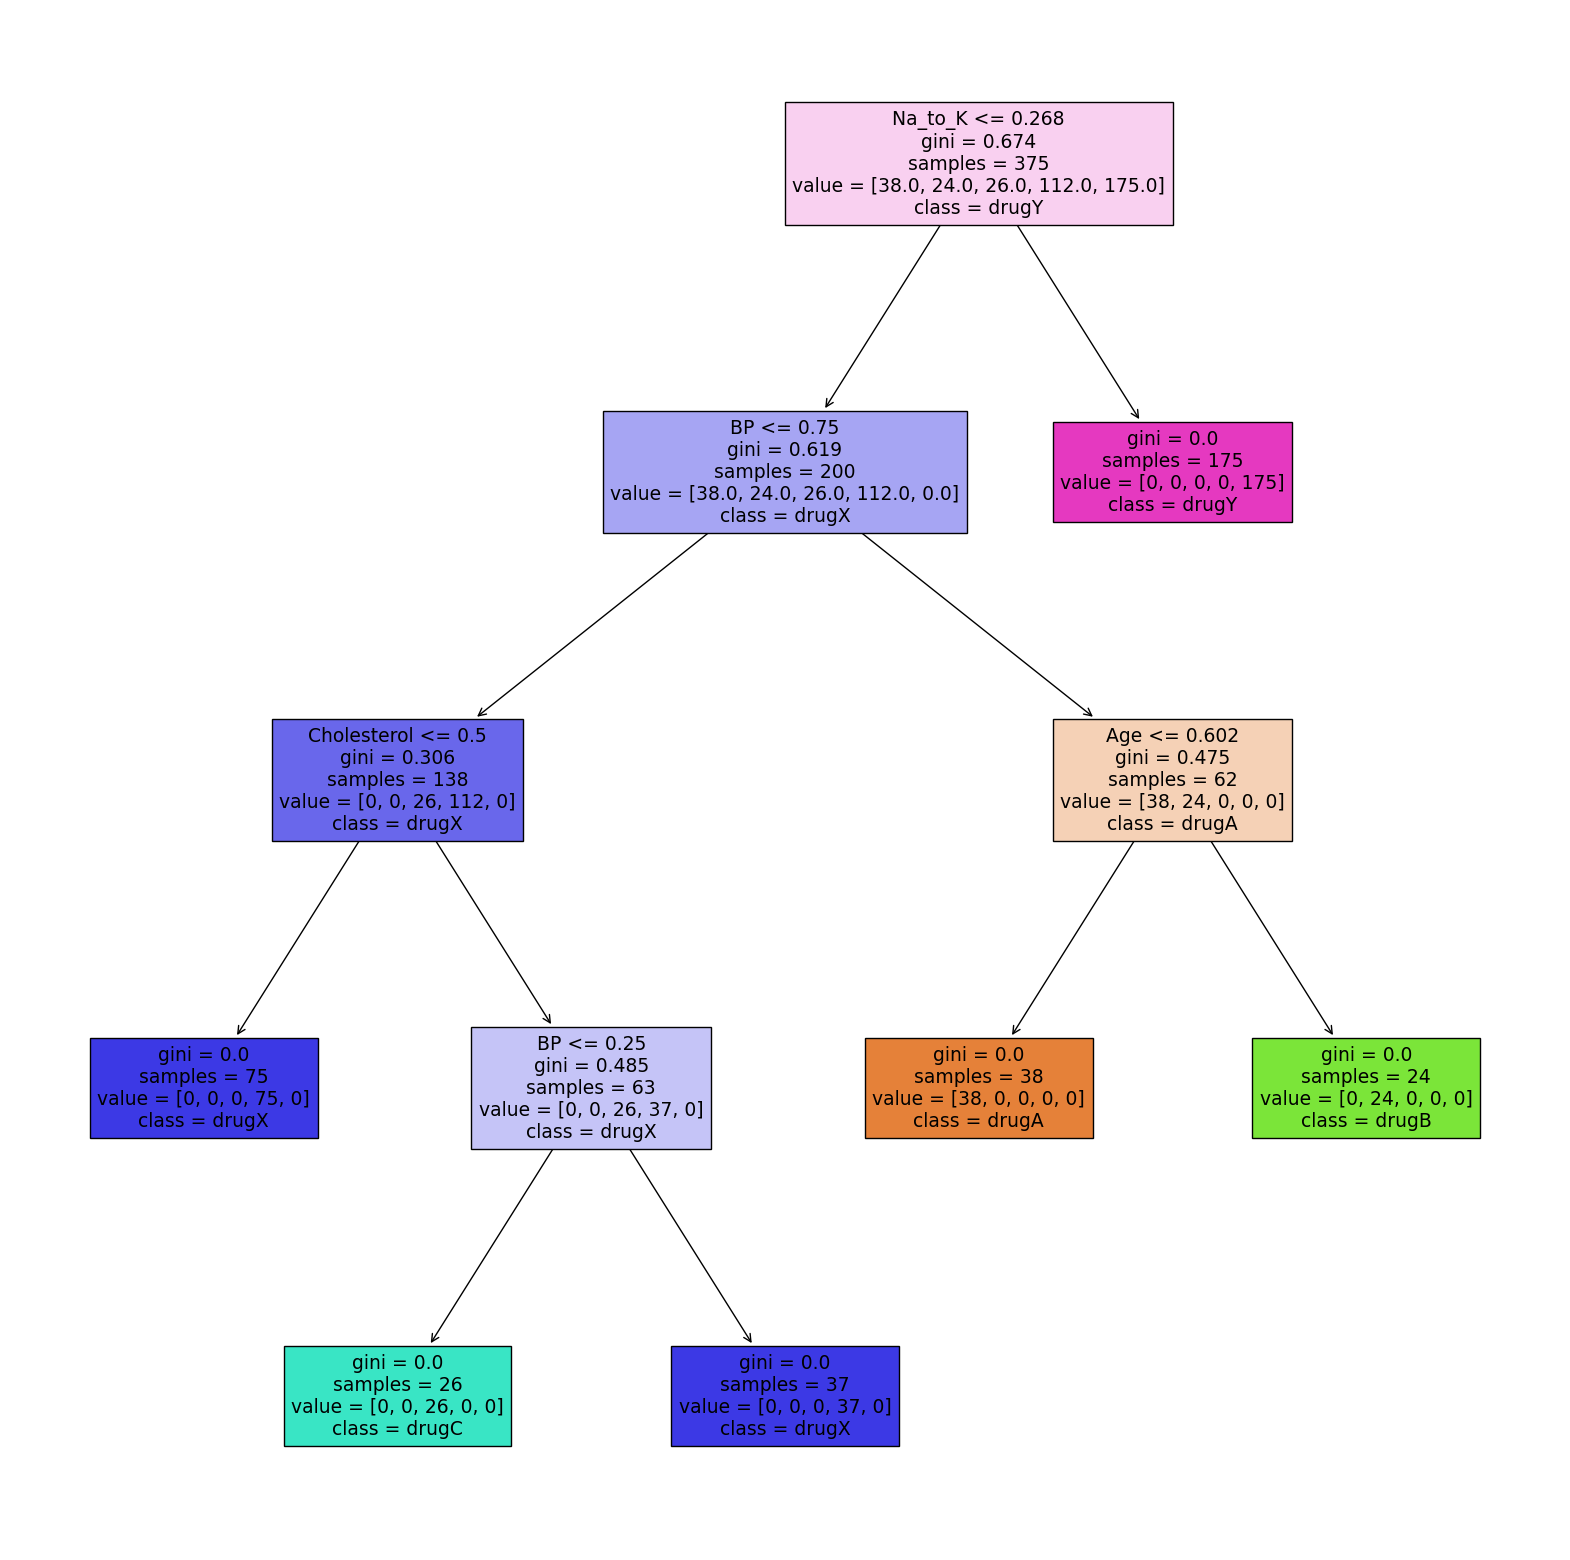

In [20]:
plt.figure(figsize=(20,20))
features = df_normalized.columns
classes = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']
tree.plot_tree(clf, feature_names = features, class_names = classes, filled = True)


In [21]:
def confusion_matrix_plot(y_train_pred, y_train, tipo):
	print(tipo , "Matriz de Confusión")
	cf = confusion_matrix(y_train_pred, y_train)
	sns.heatmap(cf, annot = True, yticklabels = classes, xticklabels = classes, cmap='Blues', fmt='g')
	plt.tight_layout

In [22]:
#Obtenemos las precisiones tanto para entrenamiento como para test
train_score = accuracy_score(y_train_pred, y_train_encoded)
test_score = accuracy_score(y_test_pred, y_test_encoded)

In [23]:
print('Accuracy en Train: ', train_score)
print('Accuracy en Test: ', test_score)

Accuracy en Train:  1.0
Accuracy en Test:  1.0


Entrenamiento Matriz de Confusión


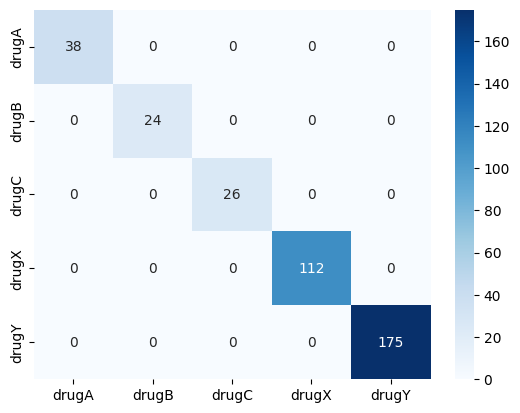

In [24]:
confusion_matrix_plot(y_train_pred, y_train_encoded, 'Entrenamiento')

Prueba Matriz de Confusión


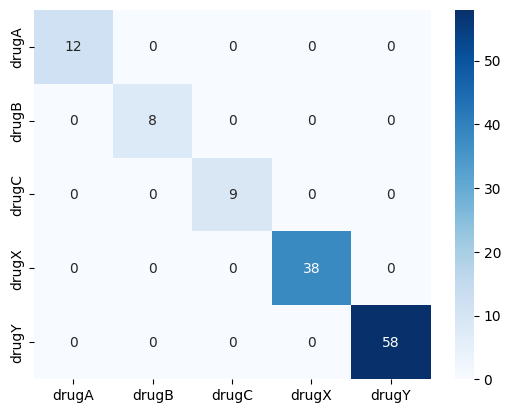

In [25]:
confusion_matrix_plot(y_test_pred, y_test_encoded, 'Prueba')

In [26]:
params = {
	'max_depth' : [2,4,6,8,10,12],
	'min_samples_split': [2,3,4],
	'min_samples_leaf': [1,2]
}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf, param_grid = params)
gcv.fit(x_train, y_train_encoded)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [27]:
model = gcv.best_estimator_
model.fit(x_train, y_train_encoded)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print('Accuracy en Train: ', accuracy_score(y_train_pred, y_train_encoded))
print('Accuracy en Test: ', accuracy_score(y_test_pred, y_test_encoded))

Accuracy en Train:  1.0
Accuracy en Test:  1.0


Entrenamiento Matriz de Confusión


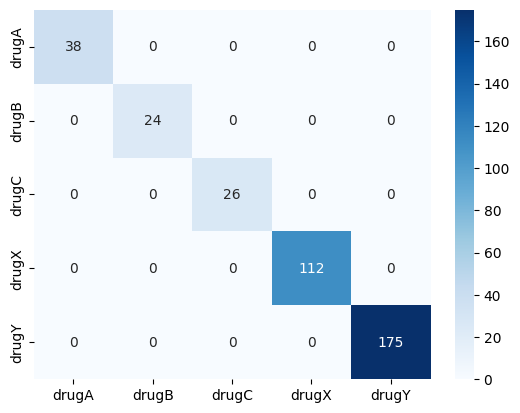

In [28]:
confusion_matrix_plot(y_train_pred, y_train_encoded, 'Entrenamiento')

Test Matriz de Confusión


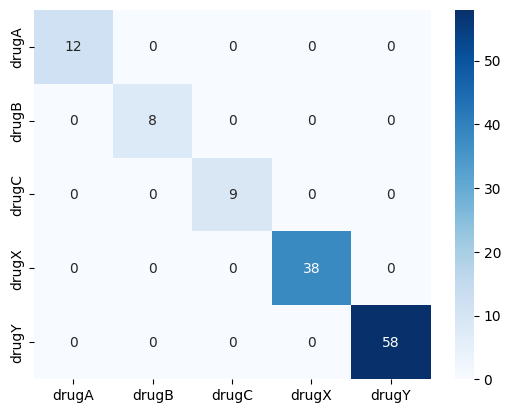

In [29]:
confusion_matrix_plot(y_test_pred, y_test_encoded, 'Test')

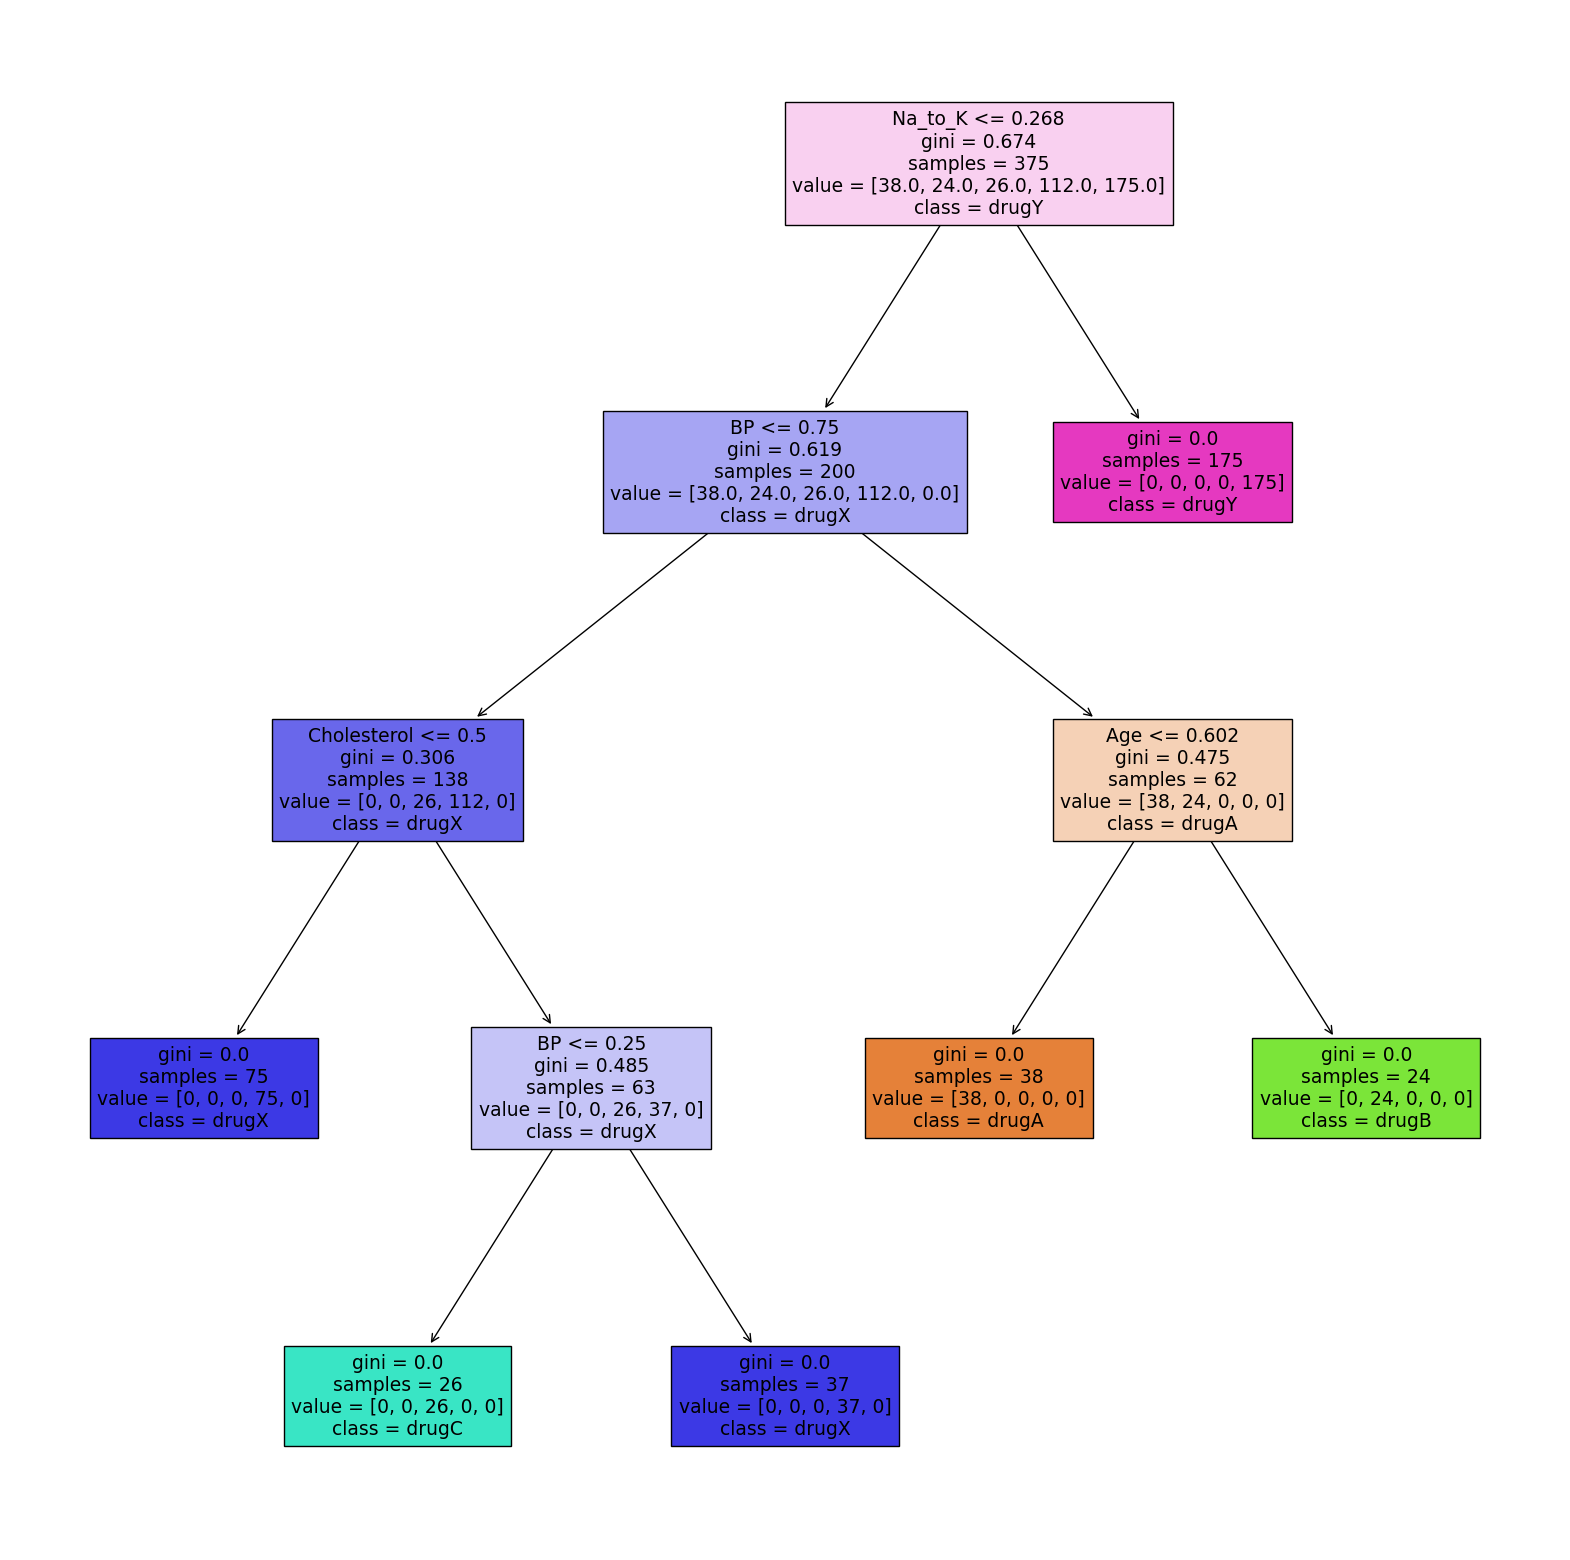

In [30]:
plt.figure(figsize=(20,20))
features = df_normalized.columns
classes = ['drugA','drugB','drugC','drugX','drugY']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

## Post Punning

In [32]:
path = clf.cost_complexity_pruning_path(x_train, y_train_encoded)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.05627053 0.07845161 0.13914066 0.34371556]


In [34]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train_encoded)
    clfs.append(clf)

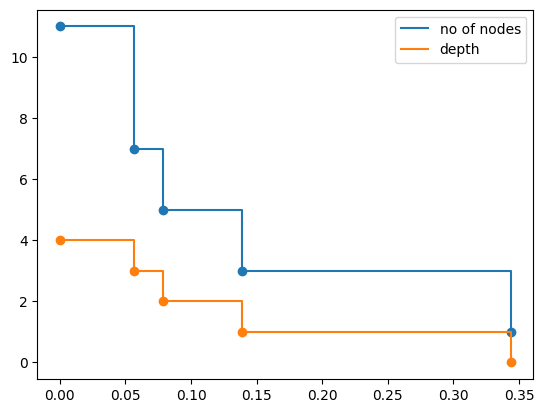

In [35]:
#clfs = clfs[:-1]
#ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

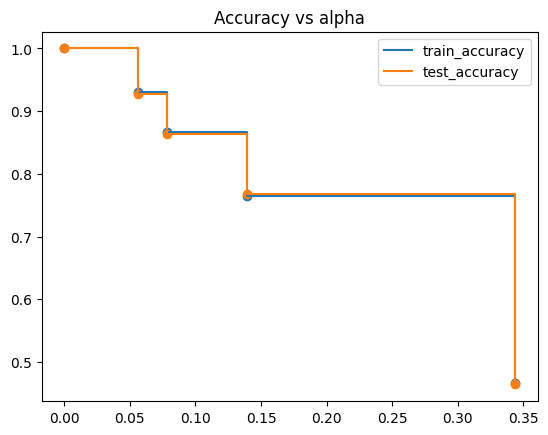

In [37]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(x_train)
    y_test_pred = c.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train_encoded))
    test_acc.append(accuracy_score(y_test_pred,y_test_encoded))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()


Train score  1.0
Test score  1.0
Train Matriz de Confusión


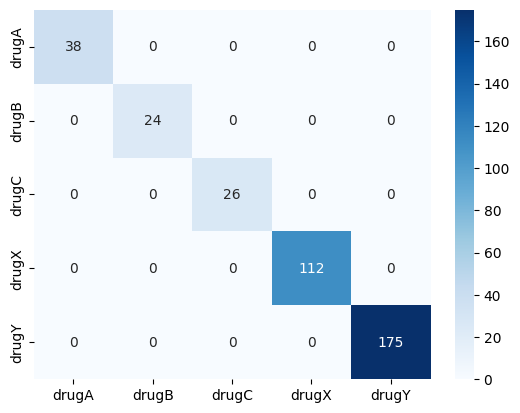

In [39]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.015)
clf_.fit(x_train,y_train_encoded)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

print('Train score ',accuracy_score(y_train_pred,y_train_encoded))
print('Test score ', accuracy_score(y_test_pred,y_test_encoded))
confusion_matrix_plot(y_train_pred,y_train_encoded,'Train')


Test Matriz de Confusión


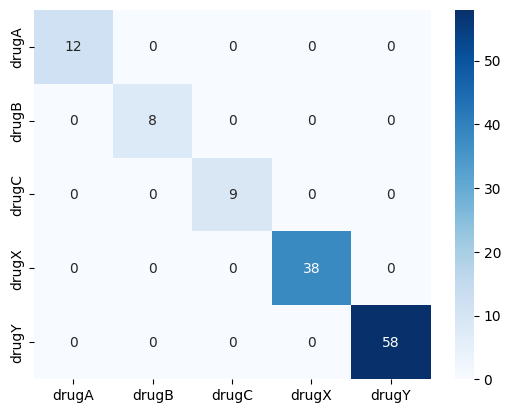

In [40]:
confusion_matrix_plot(y_test_pred,y_test_encoded,'Test')

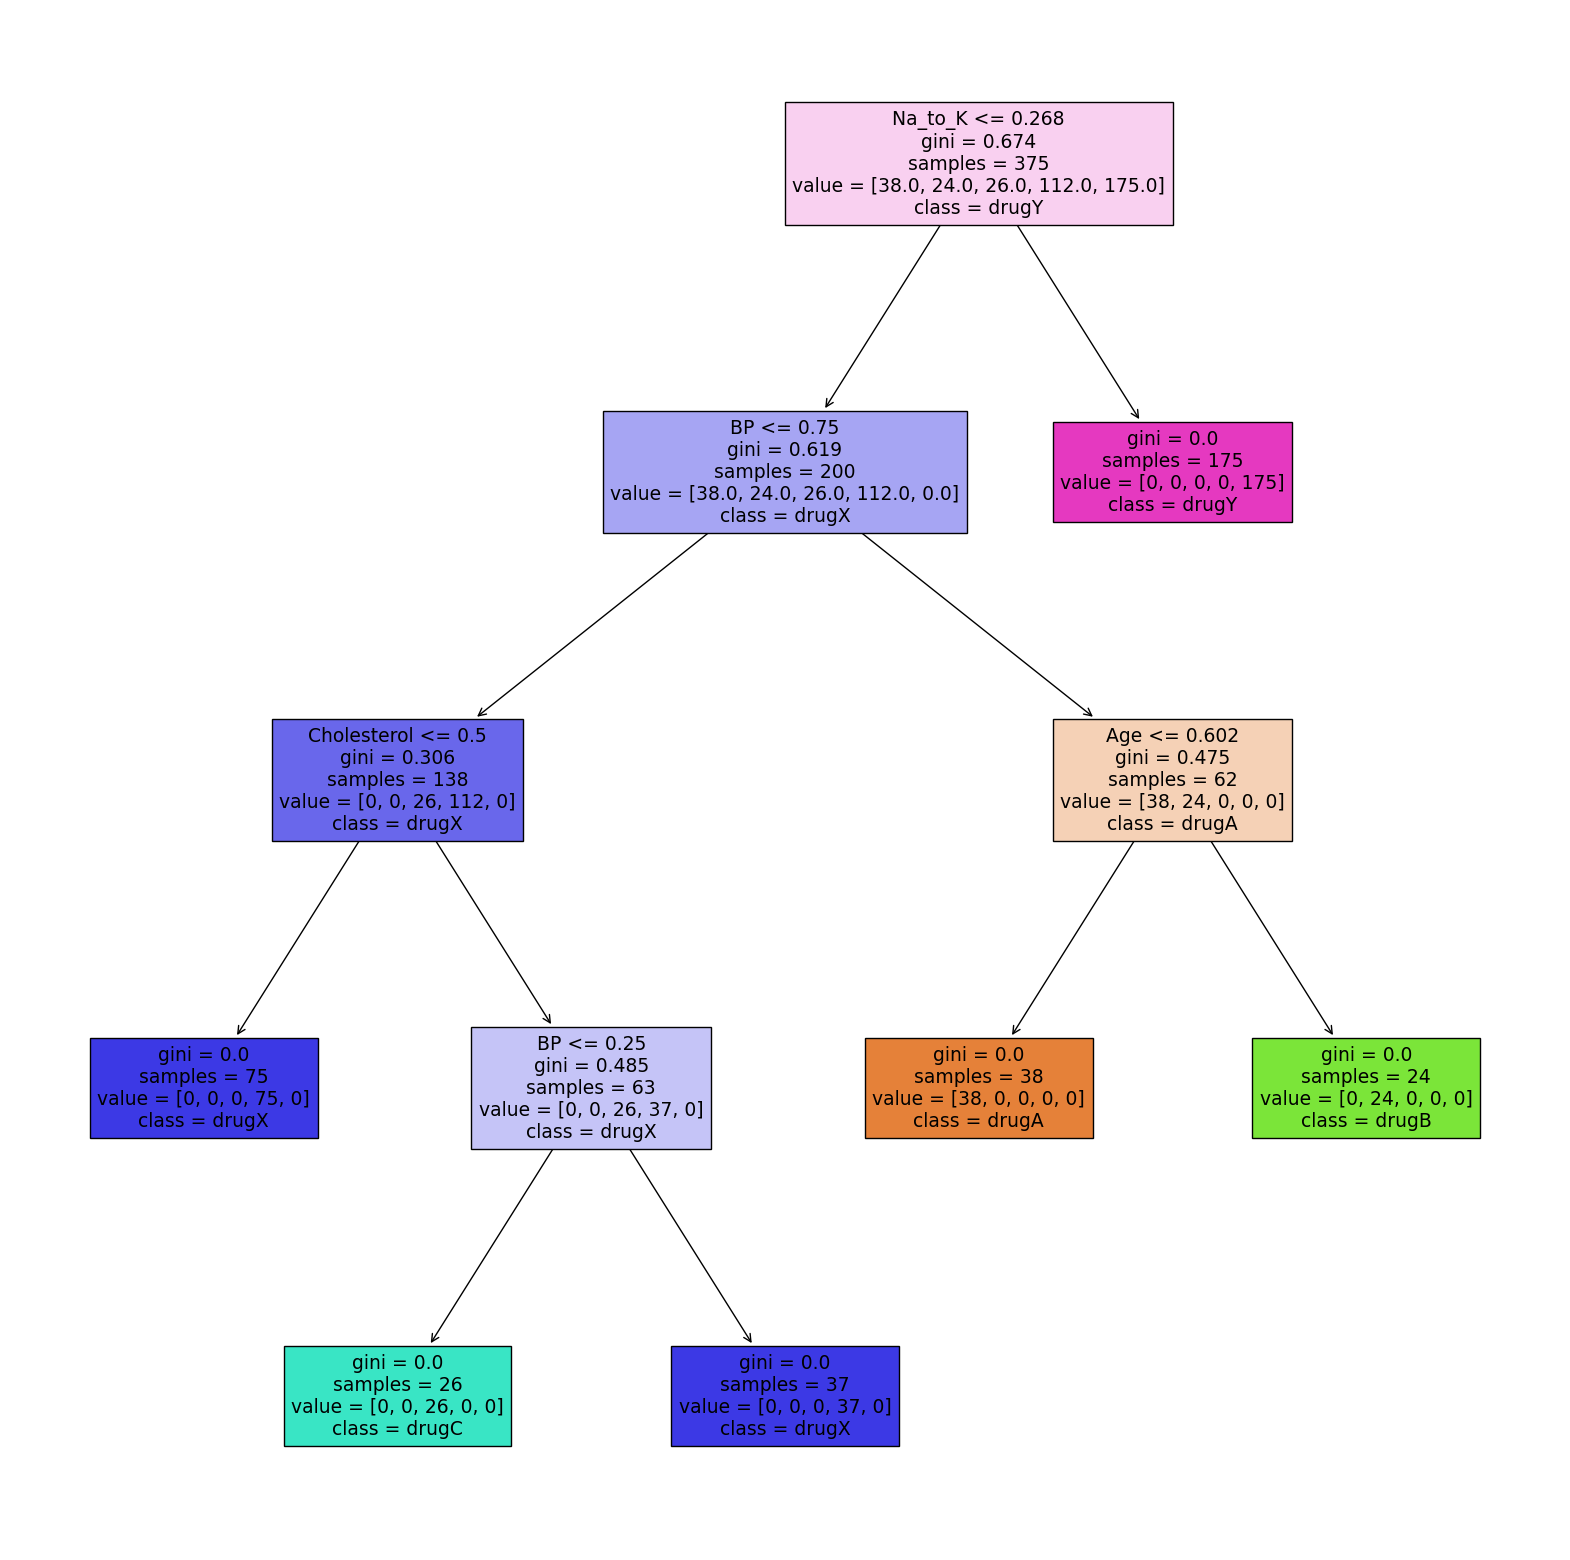

In [42]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['drugA','drugB', 'drugC', 'drugX','drugY']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()